Raúl Correa Ocañas | A01722401 | 06-03-2024

# Seccion 1: Comprehensión de los datos

In [30]:
# 1 Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# 2 Lectura de datos

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TC2004B.101/data/StressLevelDataset.csv')


# Separate features (X) and target variable (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Show the header and dataframe
# 3 Visualización de los datos tabulares
print("Header:")
display(df.head())

Header:


anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

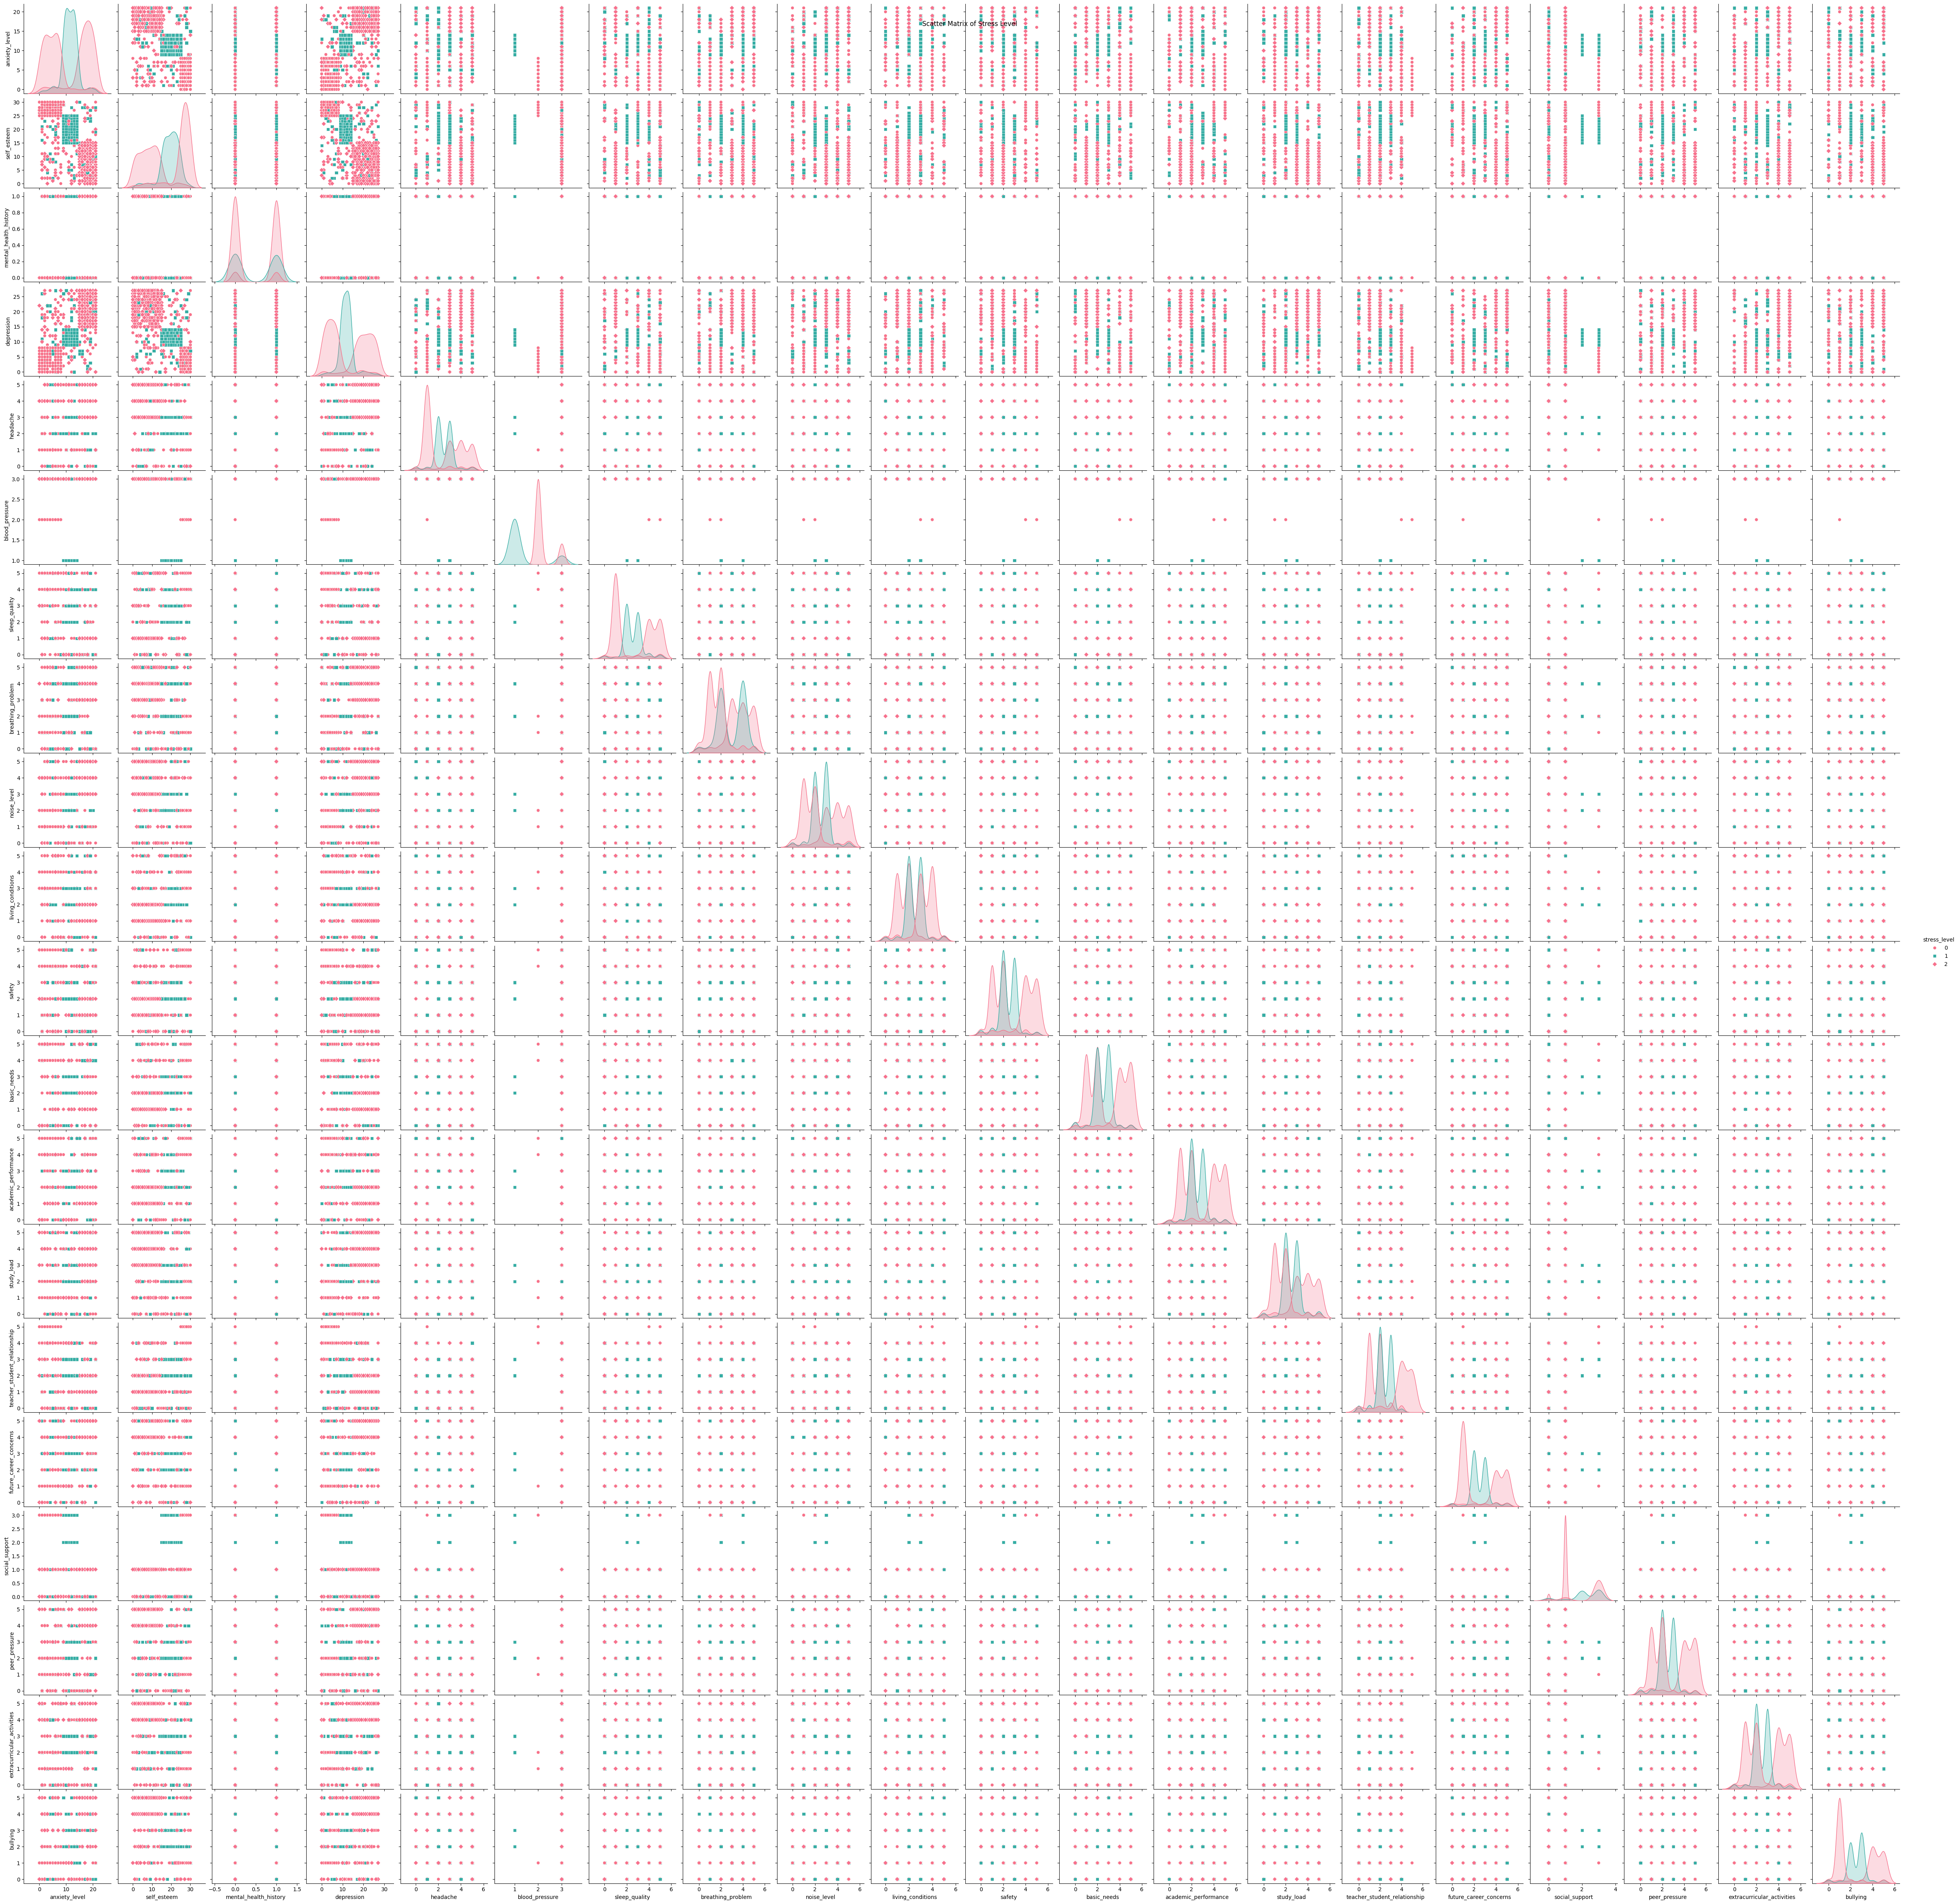

In [33]:
# Scatter matrix
# 4 Visualización de los datos gráficos
scatter_matrix = sns.pairplot(df, hue='stress_level', markers=["o", "s", "D"], palette="husl")
plt.suptitle("Scatter Matrix of Stress Level")
plt.show()

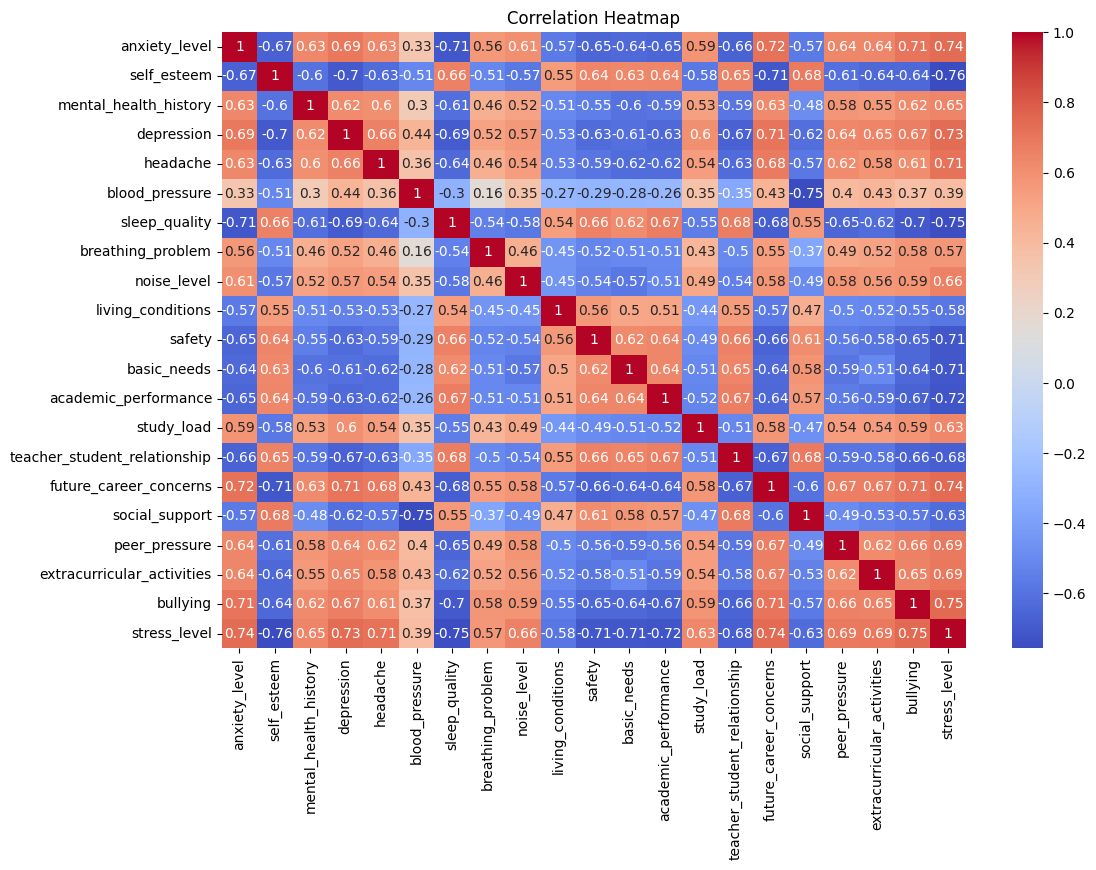

In [34]:
# Correlation heatmap
# 5 Visualización de la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

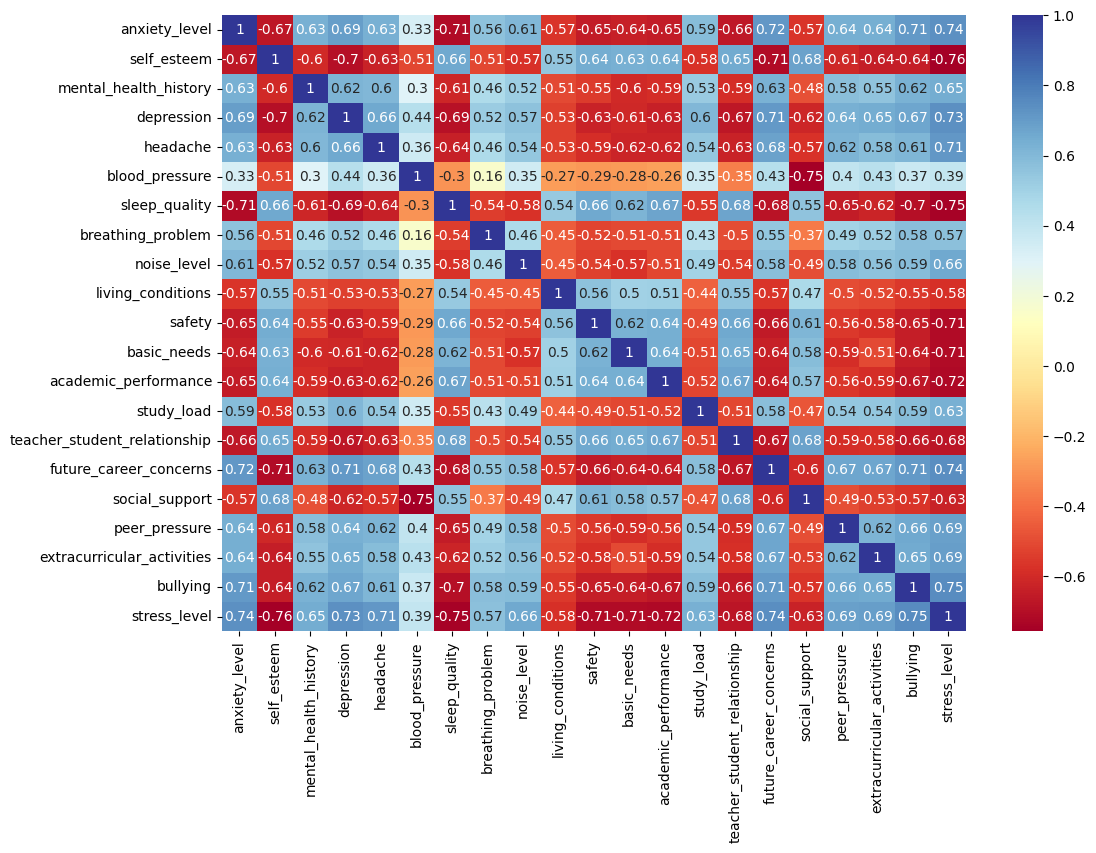

In [35]:
# Correlation heatmap
# 6 Visualización de la matriz de correlación con otro mapa de colores
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.show()

1. Se importa las bibliotecas necesarias:
    - Pandas para la manipulación de datos,
    - Seaborn para la visualización estadística,
    - Matplotlib para gráficos.

2. Se lee el archivo CSV que contiene datos sobre niveles de estrés y carga esos datos en un DataFrame de pandas.
3. Se crean dos DataFrames, uno que contiene los predictores y otro que contiene la variable objetivo.
4. Se hace una separacion de la variable objetivo y los predictores en dos sets: uno para entrenamiento y otro para pruebas.
5. Se muestra el Header del DataFrame para inspeccionar los datos.
6. Se crea una matriz de dispersión que muestra la relación entre diferentes variables. El color del punto en la matriz de dispersión representa el nivel de estrés.
7. Se calcula y visualiza una matriz de correlación de las variables numéricas en el DataFrame, utilizando un mapa de calor donde los valores más altos de correlación se representan con colores más intensos.
8. Se hace otra matriz de correlación, pero esta vez se muestra con un mapa de calor con un gradiente de color diferente.

# Sección 2: Regresión Logística

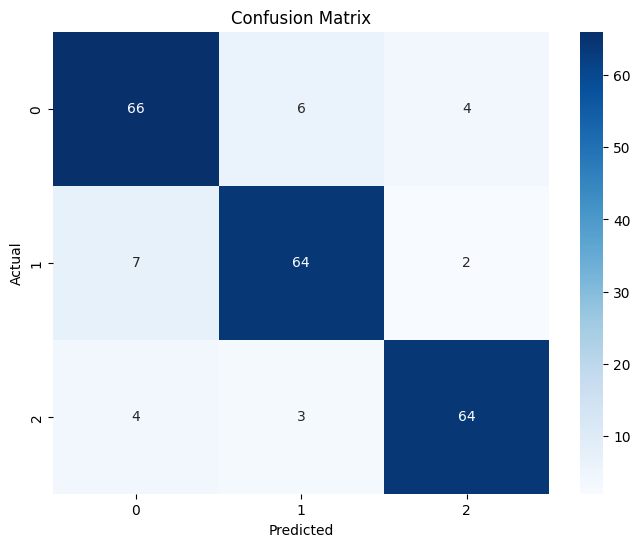

Classification Report saved to Excel files.


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


1. Se hace una normalización de los datos, en este caso se utiliza el método StandardScaler de la biblioteca sklearn.
2. Se inicializa una variable que resguarda un modelo de regresión logística y se entrena con los datos de entrenamiento.
3. Se realizan predicciones sobre el conjunto de prueba.
4. Se visualiza la matriz de confusión para evaluar el rendimiento del modelo.
5. Se guardan la matriz de confusión y el informe de clasificación en archivos de Excel para un registro detallado.

# Sección 3: Support Vector Machines - Support Vector Classifier

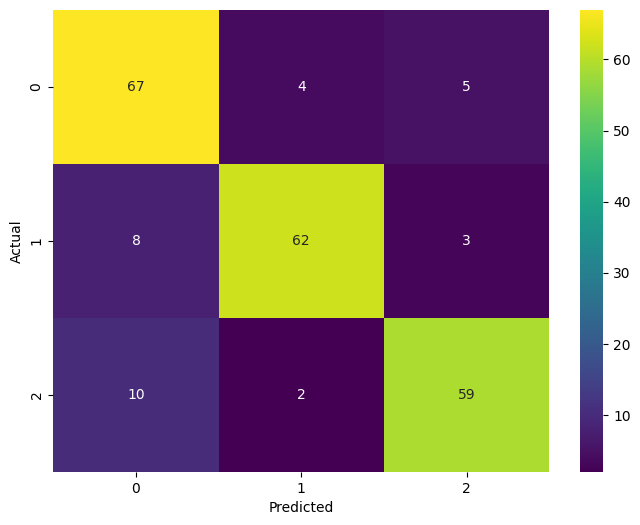

Classification Report saved to Excel files.


In [37]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


1. Se hace una normalización de los datos. Para este caso se utiliza nuevamente el método StandardScaler de la biblioteca sklearn.
2. Se inicializa una variable que resguarda un modelo de Máquina de Vectores de Soporte y se entrena con los datos de entrenamiento.
3. Se realizan predicciones sobre el conjunto de prueba.
4. Se visualiza la matriz de confusión para evaluar el rendimiento del modelo.
5. Se guardan la matriz de confusión y el informe de clasificación en archivos de Excel para un registro detallado.

# Sección 4: Gradient Boosting Classifier

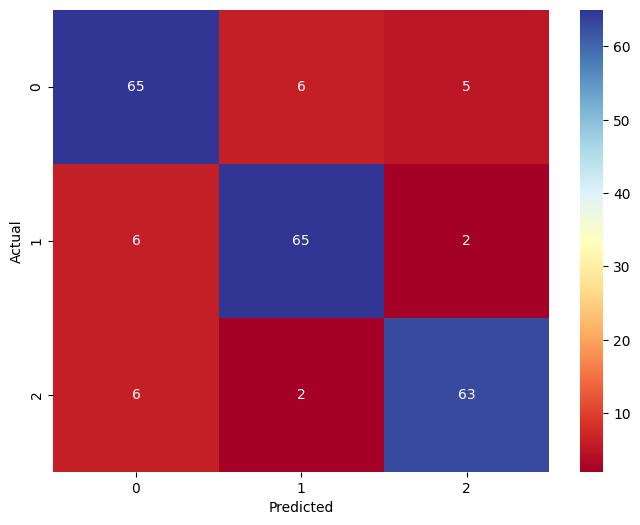

Classification Report saved to Excel files.


In [38]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  # Change this line
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()  # Change this line
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdYlBu", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/confusion_matrix_gb.xlsx')  # Change this line

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report_gb.xlsx')  # Change this line

# Display the results
print("Classification Report saved to Excel files.")


1. Nuevamente, se hace una normalización de los datos con StandardScaler.
2. Se inicializa una variable que resguarda un modelo de Potenciación de Gradiente, y se entrena con los datos de entrenamiento.
3. Se realizan predicciones sobre el conjunto de prueba.
4. Se visualiza la matriz de confusión para evaluar el rendimiento del modelo.
5. Se guardan la matriz de confusión y el informe de clasificación en archivos de Excel para un registro detallado.

# Sección 5

Epoch 1/10
28/28 [==============================] - 1s 11ms/step - loss: -0.9052 - accuracy: 0.4000 - val_loss: -2.8054 - val_accuracy: 0.6182
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: -6.0678 - accuracy: 0.5636 - val_loss: -10.2024 - val_accuracy: 0.5818
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: -17.6786 - accuracy: 0.5114 - val_loss: -25.8910 - val_accuracy: 0.5364
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: -39.8760 - accuracy: 0.4875 - val_loss: -55.5047 - val_accuracy: 0.5364
Epoch 5/10
28/28 [==============================] - 0s 4ms/step - loss: -78.2804 - accuracy: 0.4932 - val_loss: -100.3784 - val_accuracy: 0.5818
Epoch 6/10
28/28 [==============================] - 0s 4ms/step - loss: -137.7866 - accuracy: 0.5000 - val_loss: -169.3730 - val_accuracy: 0.5591
Epoch 7/10
28/28 [==============================] - 0s 5ms/step - loss: -224.1268 - accuracy: 0.4977 - val_loss: -268.5362 - val_accura

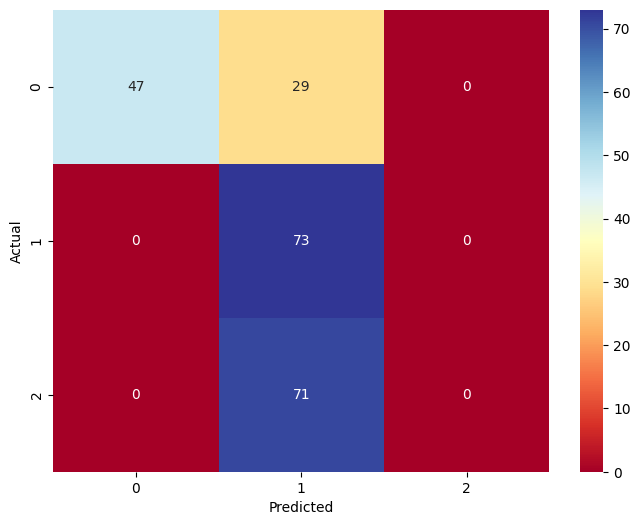

Classification Report saved to Excel files.


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [39]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (assuming X has a 2D shape)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create and train the CNN model
# Comenzamos creando un modelo secuencial
cnn_model = Sequential()
# Añadimos una capa de convolución con 64 filtros, un tamaño de kernel de 3 y una función de activación ReLU
# La entrada tiene la forma de X_train_reshaped
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
# Añadimos una capa de MaxPooling con un tamaño de pool de 2
# Esto reduce la dimensión de la salida de la capa anterior a la mitad
cnn_model.add(MaxPooling1D(pool_size=2))
# Aplanamos la salida de la capa de MaxPooling
# Esto nos permite conectar la salida de la capa de MaxPooling a una capa densa,
cnn_model.add(Flatten())
# Añadimos una capa densa con 50 neuronas y una función de activación ReLU
cnn_model.add(Dense(50, activation='relu'))
# Añadimos una capa de salida con una neurona y una función de activación sigmoide
cnn_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification



cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
y_pred_proba = cnn_model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdYlBu", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/confusion_matrix_cnn.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report_cnn.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


1. Nuevamente, se hace una normalización de los datos con StandardScaler.
2. Se remodelan los datos para la entrada de una CNN.
3. Se crea un modelo de CNN, se compila y se entrena con los datos de entrenamiento.
4. Se realizan predicciones sobre el conjunto de prueba.
5. Se visualiza la matriz de confusión para evaluar el rendimiento del modelo.
6. Se guardan la matriz de confusión y el informe de clasificación en archivos de Excel para un registro detallado.

# Sección 6

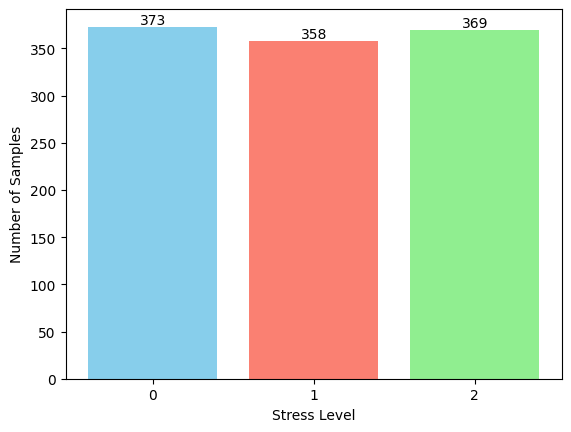

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Define attractive colors
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot the distribution of stress_level classes
class_counts = df['stress_level'].value_counts().sort_index()
classes = class_counts.index
counts = class_counts.values

plt.bar(classes, counts, color=colors, label='Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Number of Samples')

# Add labels to each bar
for i, count in enumerate(counts):
    plt.text(classes[i], count + 0.1, str(count), ha='center', va='bottom', color='black')

# Set x-axis ticks to show only 0, 1, and 2
plt.xticks(classes)

plt.show()


1. Se asignan colores a los valores de estrés
2. Se registra un conteo de cada valor de estrés
3. Se visualiza un gráfico de barras que muestra la distribución de los valores de estrés.

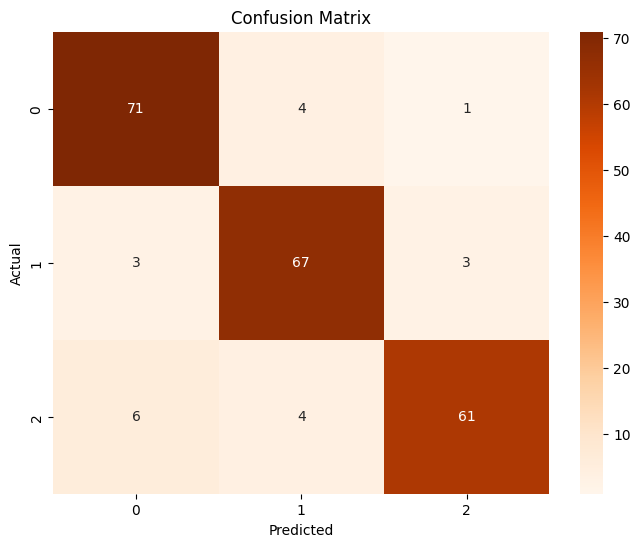

Classification Report saved to Excel files.


In [41]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/confusion_matrix_dt.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report_dt.xlsx')

# Display the results
print("Classification Report saved to Excel files.")


1. Nuevamente, se hace una normalización de los datos con StandardScaler.
3. Se crea un modelo de DecisionTreeClassifier, se compila y se entrena con los datos de entrenamiento.
4. Se realizan predicciones sobre el conjunto de prueba.
5. Se visualiza la matriz de confusión para evaluar el rendimiento del modelo.
6. Se guardan la matriz de confusión y el informe de clasificación en archivos de Excel para un registro detallado.

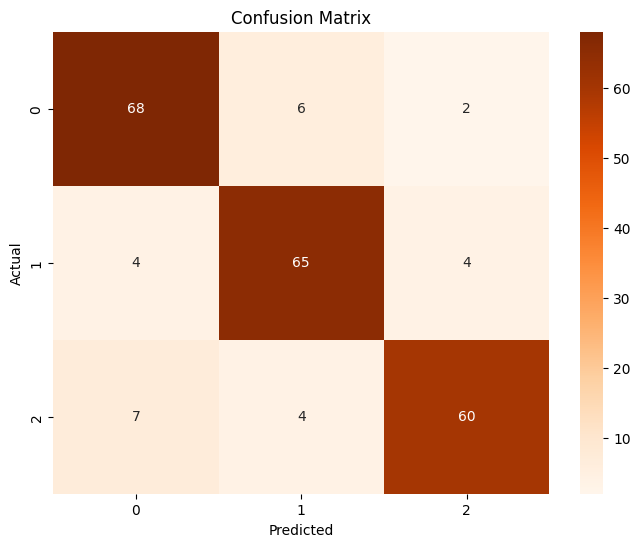



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



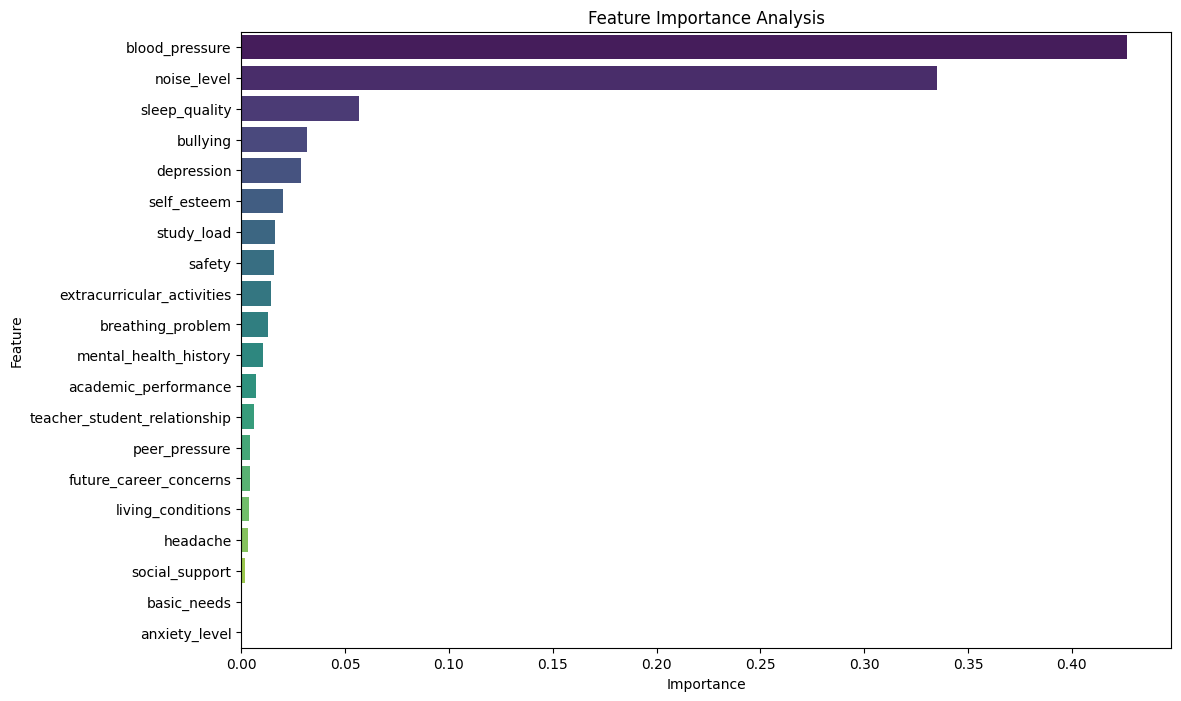

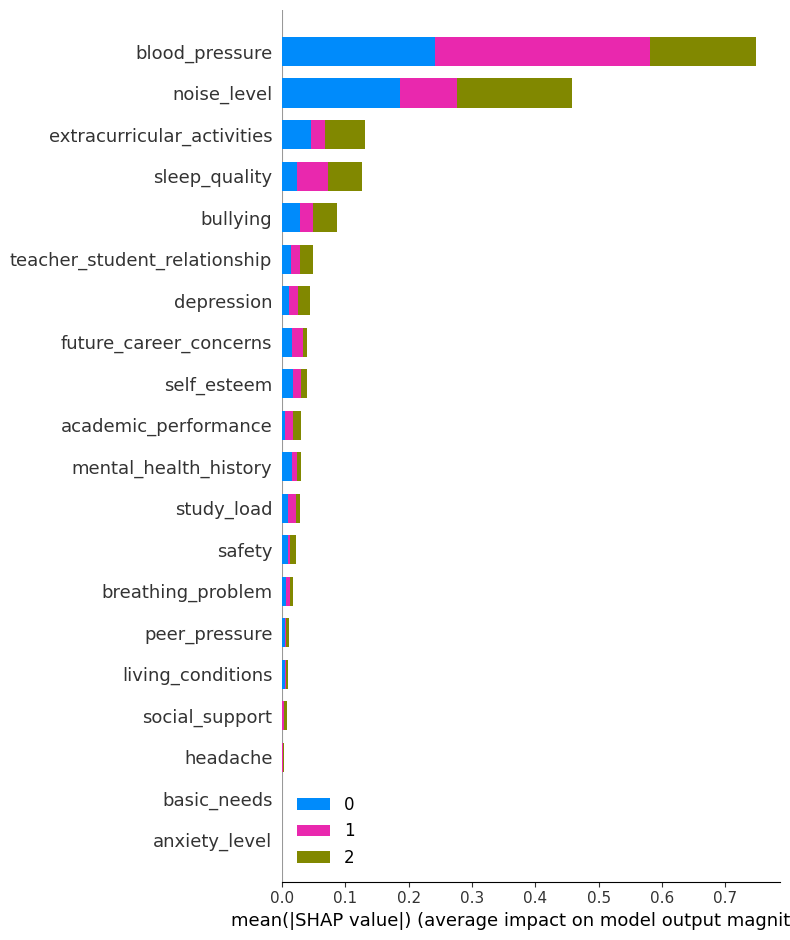

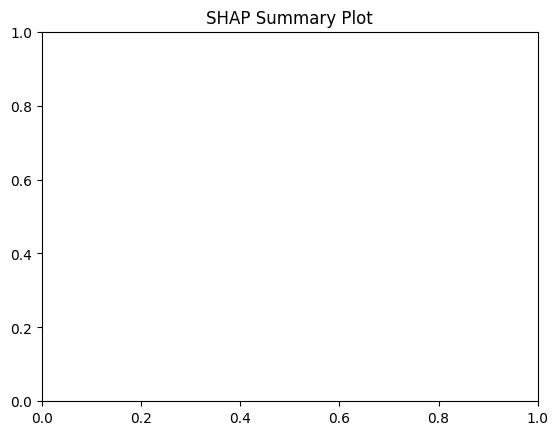

Classification Report and Feature Importance saved to Excel files.


In [43]:
%pip install shap
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Split the dataset into training and testing sets


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix to Excel
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['0', '1', '2'], columns=['0', '1', '2'])
confusion_matrix_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/confusion_matrix_dt.xlsx')

# Save the classification report to an Excel file
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_report_df.to_excel('/content/drive/MyDrive/Colab Notebooks/TC2004B.101/M3-Act5/classification_report_dt.xlsx')

# Feature Importance Analysis
feature_importance = dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Analysis')
plt.show()

# SHAP Analysis
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names=['0', '1', '2'])
plt.title('SHAP Summary Plot')
plt.show()

# Display the results
print("Classification Report and Feature Importance saved to Excel files.")

1. Se hace un diagrama para mostrar la importancia y aportación de features
2. Se muestra despues otro diagrama para ordenar la importancia y aportación de features para cada modelo.
3. Se guardan los valores de las matrices de confusión en archivos xlsx.